### Importation des librairies

Dans la premiere partie nous auons besoin des librairies suivantes:
* Numpy: Cette librairie permet de manpuler les donnees sous forme de vecteur et de matrices
* Pandas : Cette librairie permet de manipuler notre jeu de donnees 
* seaborn et matplotlib nous permettent de representer certaines informations sous forme de visuels

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import sklearn.neural_network
from sklearn.linear_model import LogisticRegression as LGR
import joblib

### Chargement du jeu donnees

Dans cette partie , nous allons charger notre jeu de donnee a partir du chemin d'un chemin d'acces. Pour cela nous allons utiliser la fonction read_csv de la librairie Pandas. Cette fonction d'utilise comme suit: 
dataset= pd.pd.read_csv(path , sep, header)

* dataset est la variable qui va contenir notre jeu de donnees
* pd est un objet de la librairie pandas qui nous permet de manipuler les fonctions de la dite librairie
* path est le chemin d'access de notre dataset et est un attribut obligatoire
* sep qui est un attribut optionnel qui peut prendre plusieurs valeurs
* header qui est un attribut optionnel 

In [2]:
dataset_custumer = pd.read_csv('Telco-Customer.csv')

Nous allons utiliser la fonction head et tail de la librairie pandas pour afficher respectivement les premiers et derniers elements de notre jeu de donnees

In [3]:
print(dataset_custumer.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [4]:
print(dataset_custumer.tail())

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes  

Dans la partie qui suit nous allons utiliser le fontion info() de la librerie pandas pour afficher certains informations sur notre jeu de données. elle va nous retourner le nombre de colonne le type de donnée pour chaque colonne. elle permet également de savoir s'il ya de valeure manquante

In [5]:

print(dataset_custumer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


par la suite nous allons utliser la fonction describe() pour avoir d'autre informations tel que le nombre d'element,la moyenne, l'ecart-type, le max le min...
  

In [6]:

dataset_custumer.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


nous allons maintenant chercher le nombre de classe pour notre jeu de données. pour cela nous allons utiliser une la fonction value_counts().plot.pie() pour afficher un diagramme circulaire sur la clonne "Churn" et le nombre des secteurs de cette diagramme sera le nombre de classes cherchées. comme nous pouvons le constater sur le diagramme ci-desous notre jeu de données a deux classe. en fait les clients de cette entreprise sont regroupés en deux groupe a savoir les desabonnés et le non desabonnés

<AxesSubplot:ylabel='Churn'>

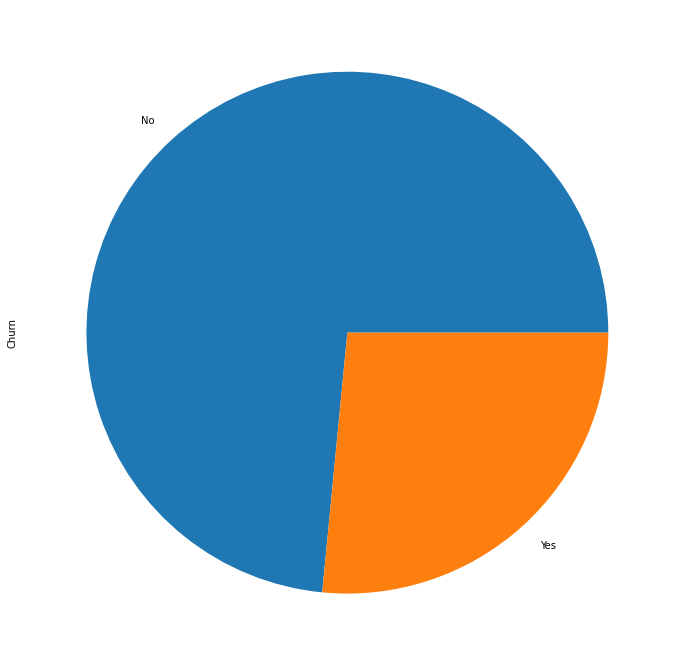

In [7]:
plt.figure(figsize=(17,12))
dataset_custumer['Churn'].value_counts().plot.pie()

Après avoir determiner le nombre de classe de notre jeu de données nous allons maintenant utilser la fonction value_counts() pour determiner le nombre d'element dans chaque classe. comme nous pouvons observer sur le retour de la fonction nous avons 1869 clients desbonnés et 5174 non désabonnés. 

In [8]:
dataset_custumer['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

dans la partie suivante nous allons faire une autre visualisation pour avoir la correllation entre la colonne "Chrun" et les autres colonnes. pou cela nous allons utiliser le methode heatmap de la librerie seaborn elle s'utilise de la manière suvante:
sns.heatmap(data, cmap='Greens')
plt.title("titre du graphe\n", fontsize=police, color='code_couleur') avec

data le variable qui contient les données à croiser
cmap=’Greens’ permet de modifier la palette de couleurs. Tu peux remplacer le Greens par Reds, Blues, Purples, etc… (le ‘s’ sert à afficher un dégradé de couleur)
plt.title(“ \n”) permet de rajouter un titre au graphique. Vous pouvez sauter une ligne en rajouter \n directement à la fin de votre titre pour améliorer l’affichage. Vous pouvez ajouter d’autres propriétés, ici nous avons décidé de modifier la taille du titre avec fontsize=18 et la couleur en précisant un code hexadécimal color=’#009432' (nous vous conseillons ce site pour les couleurs)

A la fin nous aurons une matrice avec des couleur qu'on lit de la manière suivante: La couleurs est plus foncé pour une forte corrélation et plus clair pour une faible corrélation.

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "gender"\n')

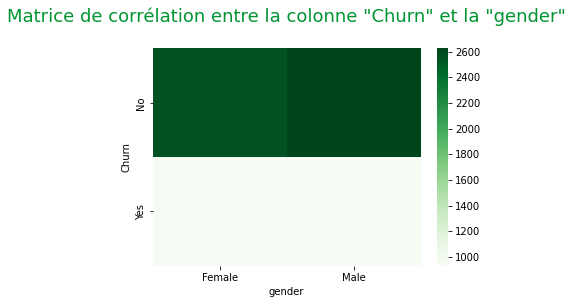

In [9]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.gender),  cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"gender\"\n", fontsize=18, color='#009432')

D'après la matrice de corrélation ci-haut nous constation que le désabonnement de clients n'est pas lié à leur sexe

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "SeniorCitizen"\n')

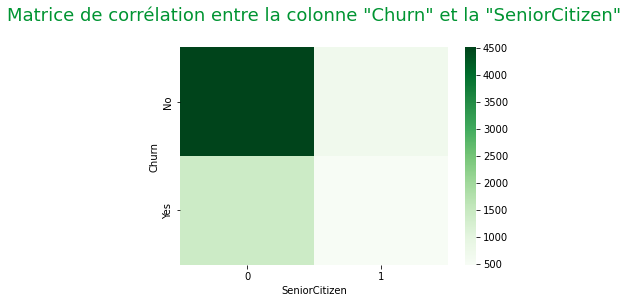

In [10]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.SeniorCitizen), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"SeniorCitizen\"\n", fontsize=18, color='#009432')

Ici on constate que le désabonnement n'est lié au clients de plus 65 ans alors qu'il est lié de manière très partielle à ceux qui on moins de 65 ans en plus on remarque aussi que la majorité des clients ont moins de 65 ans

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "Partner"\n')

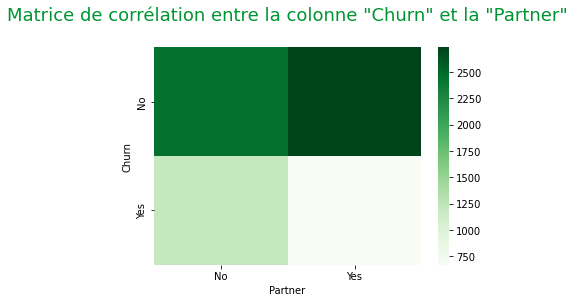

In [11]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.Partner), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"Partner\"\n", fontsize=18, color='#009432')

Ici on comprend que le désabonnement est partiellement lié aux clients non partenaire

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "Dependants"\n')

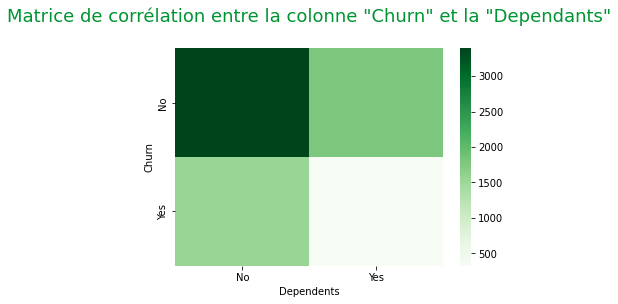

In [12]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.Dependents), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"Dependants\"\n", fontsize=18, color='#009432')

sur ce matrice on remarque le désabonnement est lié aux clients qui n'ont pas des personnes qui depend d'eux 

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "tenure"\n')

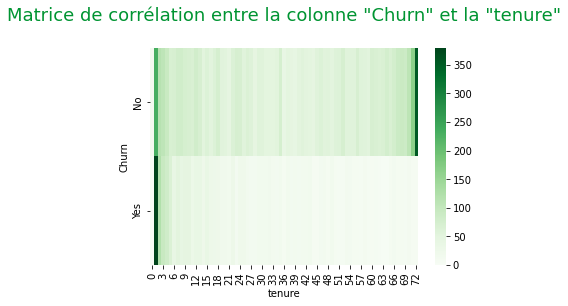

In [13]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.tenure), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"tenure\"\n", fontsize=18, color='#009432')

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "PhoneService"\n')

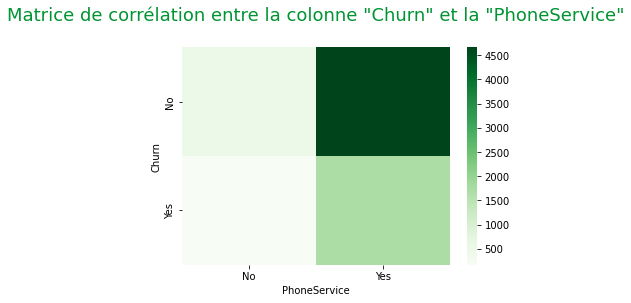

In [14]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.PhoneService), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"PhoneService\"\n", fontsize=18, color='#009432')

celle nous montre que le désabonnement est lié de manière parielle aux clients qui ont un service téléphonique 

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "MultipleLine"\n')

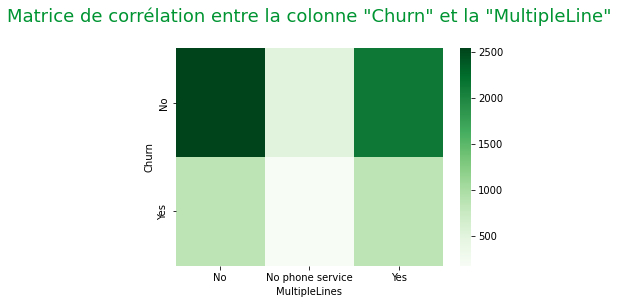

In [15]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.MultipleLines), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"MultipleLine\"\n", fontsize=18, color='#009432')

le graphe si nous montre que le désabonnement est lié aux clients qui ont une et plusieurs lignes téléphonique

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "InternetService"\n')

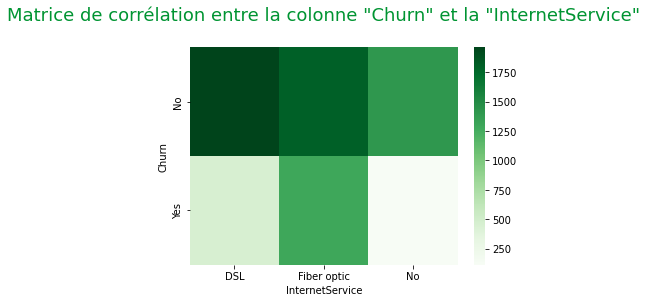

In [16]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.InternetService), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"InternetService\"\n", fontsize=18, color='#009432')

la matice ci nous montre que le désabonnement est lié aux clients utilisant la fibre optique

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "OnlineSecurity"\n')

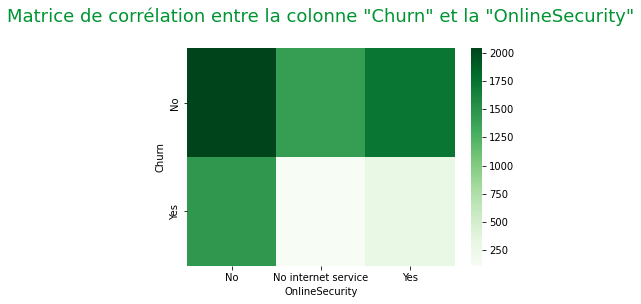

In [17]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.OnlineSecurity), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"OnlineSecurity\"\n", fontsize=18, color='#009432')

la matrice ci nous montre que le désabonnement est lié aux clients qui ne sont abonnés au service de sécurité en ligne

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "OnlineBackup"\n')

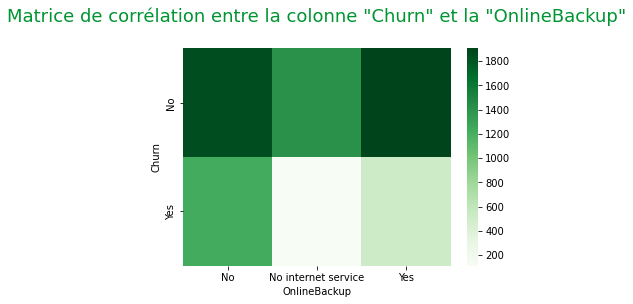

In [18]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.OnlineBackup), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"OnlineBackup\"\n", fontsize=18, color='#009432')

nous constatons ici que le désabonnement est lié aux clients qui n'ont pas un service de sauvegarde en ligne et partiellement lié aux clients qui en ont  

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "DiviceProtection"\n')

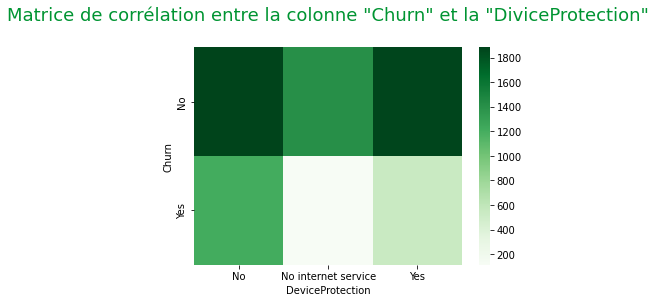

In [19]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.DeviceProtection), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"DiviceProtection\"\n", fontsize=18, color='#009432')

nous constatons ici que le désabonnement est lié aux clients qui n'ont pas un plan de protection des appareils et partiellement lié aux clients qui en ont

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "Techsupport"\n')

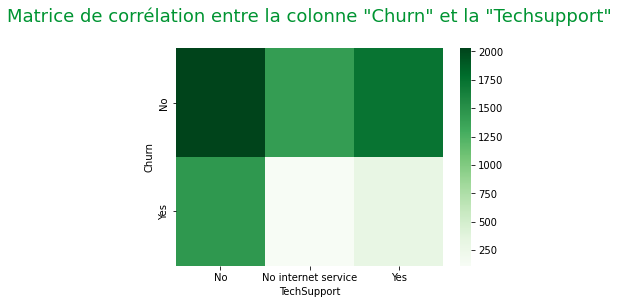

In [20]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.TechSupport), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"Techsupport\"\n", fontsize=18, color='#009432')

nous constatons ici que le désabonnement est lié aux clients qui n'ont pas une assistance technique supplementaire et partiellement lié aux clients qui en ont

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "StreamingTV"\n')

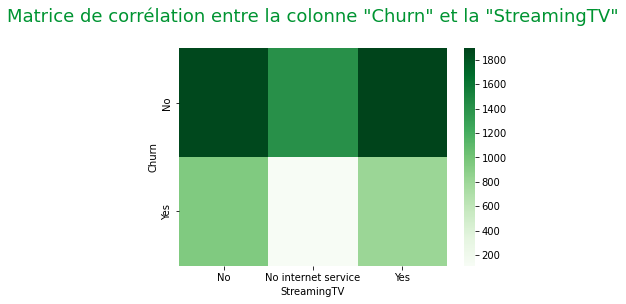

In [21]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.StreamingTV), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"StreamingTV\"\n", fontsize=18, color='#009432')

le désabonnement est lié aux clients qui utilisent leur connexion internet pour le TV

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "StreamingMovies"\n')

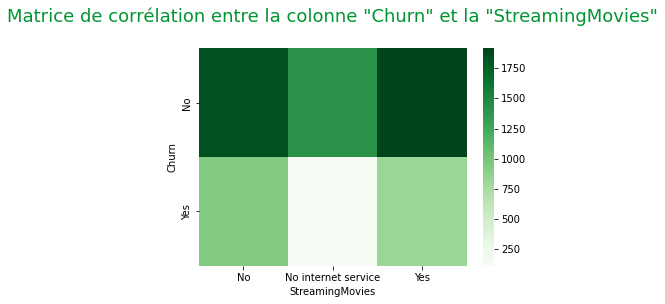

In [22]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.StreamingMovies), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"StreamingMovies\"\n", fontsize=18, color='#009432')

le désabonnement est lié aux clients qui utlisent leur internet pour le movies

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et "Contract"\n')

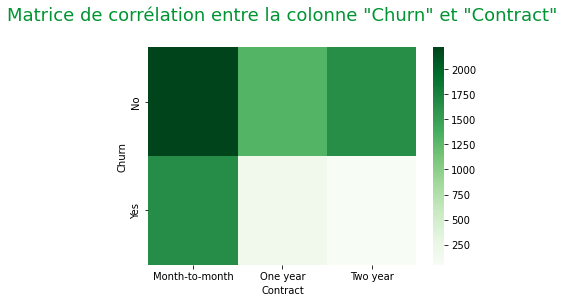

In [23]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.Contract), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et \"Contract\"\n", fontsize=18, color='#009432')

la matrice ci quand elle nous montre que le désabonnement au contrat. plus le contrat est court plus il  y a désabonnement

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "PaperlessBilling"\n')

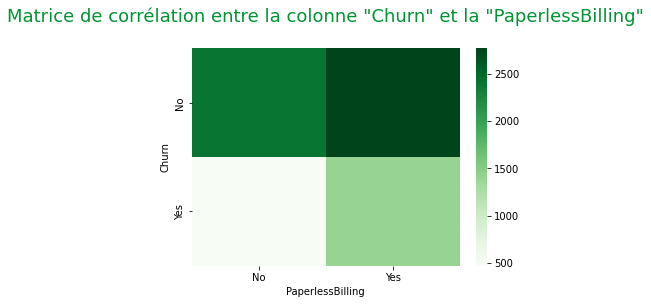

In [24]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.PaperlessBilling), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"PaperlessBilling\"\n", fontsize=18, color='#009432')

le désabonnement est lié aux clients qui ont choisi la facturation sans papier

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "PaymentMethod"\n')

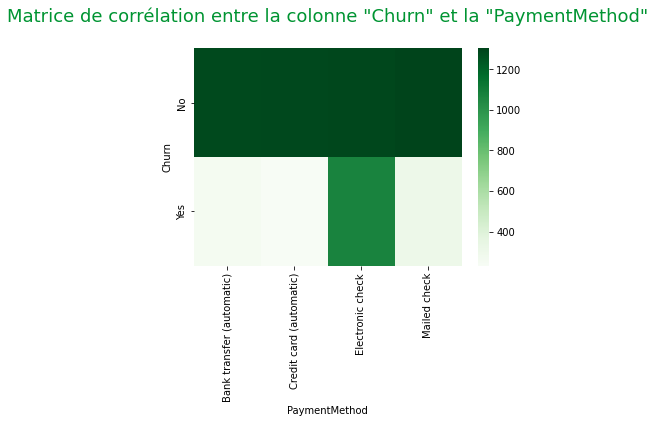

In [25]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.PaymentMethod), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"PaymentMethod\"\n", fontsize=18, color='#009432')

ici on constate le désabonnement est lié aux client qui ont pour mode de payement le check electronique

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "MonthlyCharges"\n')

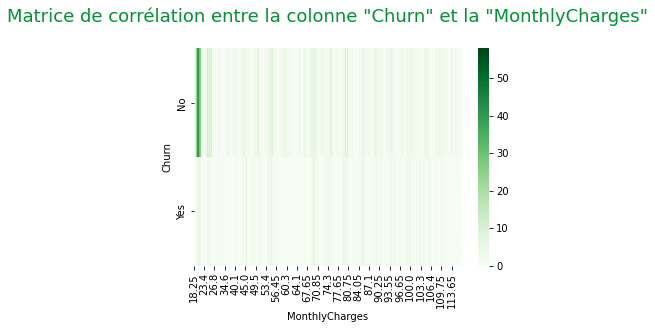

In [26]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.MonthlyCharges), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"MonthlyCharges\"\n", fontsize=18, color='#009432')

Text(0.5, 1.0, 'Matrice de corrélation entre la colonne "Churn" et la "TotalCharge"\n')

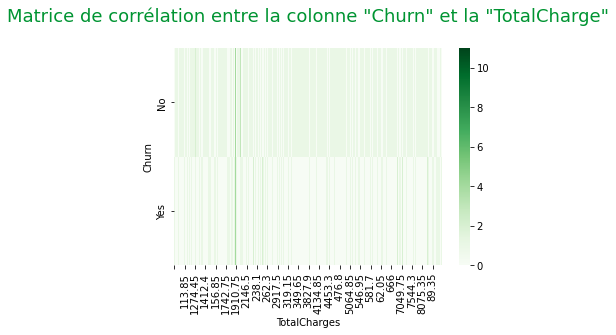

In [27]:

sns.heatmap(pd.crosstab(dataset_custumer.Churn, dataset_custumer.TotalCharges), cmap='Greens')
plt.title("Matrice de corrélation entre la colonne \"Churn\" et la \"TotalCharge\"\n", fontsize=18, color='#009432')

### retrouvons les donnees non numeriques de notre jeu de donnees

Nous allons maintenant identifier toutes colonnes ayant les valeurs non numeriques ainsi que les valeurs uniques de chacine de ces colonnes.


In [28]:
cols_cat= dataset_custumer.select_dtypes(exclude = np.number).columns
for col in cols_cat:
    print(col , dataset_custumer[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


### interpertation
Nous remarquons que nous avons plusieurs colonnes ayant les valeurs non numeriques.  
La colonne Gender a deux valeurs uniques a savoir female et male.  
La colonne Partner a deux valeurs uniques à savoir Yes et No  
La colonne Dependents a aussi deux valeurs uniques Yes et No  
La colonne PhoneService a également deux valeurs uniques Yes et No    
La colonne MultipleLines a trois valeurs uniques: No phone service, No et Yes  
La colonne InternetService a trois valeurs uniques: DSL, Fibre optique et No  
La colonne OnligeSecurity a trois valeurs uniques: Yes, No et No internet service  
La colonne OnlineBackup a tois valeurs uniques : Yes, No et No internet service  
La colonne DiviceProtection a trois valeurs : Yes , No et No internet service   
La colonne TechSupport a trois valeurs : Yes , No et No internet service  
La colonne StreamingTV a trois valeurs : Yes , No et No internet service  
La colonne StreamingMovies a trois valeurs : Yes , No et No internet service  
La colonne Contract a trois valeurs uniques : month-to-month, One year et Two year  
La colonne PaperlessBilling a deux valeurs uniques : Yes et No  
La colonne PaymentMethod a quatre valeurs uniques : 'Electronic check' 'Mailed check' 'Bank transfer (automatic)' 'Credit card (automatic)'  
La colonne Churn a deux valeurs uniques: Yes et No  

### La discretisation des données
Dans la partie suivante nous allons faire la discretisation des nnos données en remplaçant les données non numerique par des nombre. Nous allons par exemple faire ceci:  
0 et 1 pour les colonnes qui ont deux valeurs uniques  
-1 0 et 1 pour les colonnes qui ont trois valeurs uniques  
-1 0 1 et 2 pour la clonne qui a quatre valeurs uniques

### La variable ds va contenir le dataset numerique

pour la colonne gender nous allons remplacer la valeur male par 0 et la valeur femele par 1  

In [29]:
ds = dataset_custumer.replace({'gender': {'Female': 1, 'Male': 0}})

pour la colonne Partner nous allons remplacer la valeur Yes par 0  et 'No' par 1

In [30]:
ds = ds.replace({'Partner': {'Yes': 0, 'No': 1}})

pour la colonne Dependents nous allons remplacer la valeur 'No' par 1 et 'Yes' par 0 

In [31]:
ds = ds.replace({'Dependents': {'Yes': 0, 'No': 1}})

pour la colonne PhoneService nous allons remplacer la valeur 'No' par 1 et 'Yes' par 0 

In [32]:
ds = ds.replace({'PhoneService': {'Yes': 0, 'No': 1}})

pour la colonne MultipleLines nous allons remplacer la valeur 'No phone service' par -1, 'No' par 1 et 'Yes' par 0  

In [33]:
ds = ds.replace({'MultipleLines': {'Yes': 0, 'No': 1, 'No phone service': -1}})

pour la colonne InternetService nous allons remplacer la valeur 'DSL' par 0, 'Fiber optic' par -1 et 'No' par 1   

In [34]:
ds = ds.replace({'InternetService': {'DSL': 0, 'No': 1, 'Fiber optic': -1}})

pour la colonne OnlineSecurity nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [35]:
ds = ds.replace({'OnlineSecurity': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne OnlineBackup nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [36]:
ds = ds.replace({'OnlineBackup': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne DeviceProtection nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [37]:
ds = ds.replace({'DeviceProtection': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne TechSupport nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [38]:
ds = ds.replace({'TechSupport': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne StreamingTV nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [39]:
ds = ds.replace({'StreamingTV': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne StreamingMovies nous allons remplacer la valeur 'No' par 1, 'Yes' par 0 et 'No internet service' par -1

In [40]:
ds = ds.replace({'StreamingMovies': {'Yes': 0, 'No': 1, 'No internet service': -1}})

pour la colonne PaperlessBilling nous allons remplacer la valeur 'No' par 1, 'Yes' par 0

In [41]:
ds = ds.replace({'PaperlessBilling': {'Yes': 0, 'No': 1}})

pour la colonne Churn nous allons remplacer la valeur 'No' par 1, 'Yes' par 0

In [42]:
ds = ds.replace({'Churn': {'Yes': 0, 'No': 1}})

pour la colonne Contract nous allons remplacer la valeur 'Month-to-month' par 0, 'One year' par 1 et 'Two year' par -1 

In [43]:
ds = ds.replace({'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': -1}})

pour la colonne PaymentMethod nous allons remplacer la valeur 'Electronic check' par -1, 'Mailed check' par 0, 'Bank transfer (automatic)' par 1 et 'Credit card (automatic)' par 2

In [44]:
ds = ds.replace({'PaymentMethod': {'Mailed check': 0, 'Bank transfer (automatic)': 1, 'Electronic check': -1, 'Credit card (automatic)': 2}})

### Maintenant nous allons convertir les valeurs de la colonne TotalCharges en foal.  
pour cela on va utiliser la methode to_numeric() qui s'utilise de la manière suivante:  
dataset['nom_colonne'] = pd.to_numeric(dataset['nom_colonne'], errors = 'rise') avec:  
dataset la variable qui contient le jeu de donnée  
nom_colonne le nom de la colonne consernée  
foalt le type du retour  
errors = 'rise' qui signifie lève des exeptions pour les valeurs non valides.  

In [45]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'],errors = 'coerce')

maintenant nous allons supprimer la colonne custumerID car elle ne sera pas utilisée pour la prediction pour le faire on utilise la fonction del() de pandas.

In [46]:
del ds['customerID']

In [47]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Apres cette phase, on va selectionner les attributs qu'on garde pour le training. Pour ce faire nous allons calculer et tracer la correlation entre la sortie et les attributs

In [48]:
plt.figure(figsize=(17,12))
ds.corr().style.background_gradient()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,-0.001808,0.010517,-0.005106,-0.006488,-0.000485,-0.010380,-0.003429,-0.002032,0.005092,0.000985,0.001156,-0.000191,-0.007230,-0.011754,0.005209,0.014569,-0.000048,-0.008612
SeniorCitizen,0.001874,1.000000,-0.016479,0.211185,0.016567,-0.008576,-0.099883,-0.259390,0.210897,0.152780,0.157095,0.223770,0.130130,0.120802,0.046573,-0.156530,-0.093704,0.220173,0.102411,-0.150889
Partner,-0.001808,-0.016479,1.000000,0.452676,-0.379697,0.017706,0.090981,-0.000132,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.108052,-0.014877,-0.133115,-0.096848,-0.319072,-0.150448
Dependents,0.010517,0.211185,0.452676,1.000000,-0.159712,-0.001762,-0.016875,-0.179631,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.089060,-0.111377,-0.123844,0.113890,-0.064653,-0.164221
tenure,-0.005106,0.016567,-0.379697,-0.159712,1.000000,-0.008448,-0.242279,-0.033230,-0.145298,-0.178651,-0.178649,-0.144459,-0.136145,-0.140781,-0.233426,-0.006152,0.340305,0.247900,0.825880,0.352229
PhoneService,-0.006488,-0.008576,0.017706,-0.001762,-0.008448,1.000000,-0.691070,0.093720,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.003940,0.016505,0.004070,-0.247398,-0.113008,0.011942
MultipleLines,-0.000485,-0.099883,0.090981,-0.016875,-0.242279,-0.691070,1.000000,0.174989,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.049224,0.108230,-0.030659,-0.146153,-0.251357,0.019423
InternetService,-0.010380,-0.259390,-0.000132,-0.179631,-0.033230,0.093720,0.174989,1.000000,-0.764943,-0.686403,-0.682448,-0.760985,-0.617704,-0.620005,-0.117963,0.378108,0.178137,-0.905491,-0.428212,0.316846
OnlineSecurity,-0.003429,0.210897,0.081850,0.190523,-0.145298,0.125353,-0.235021,-0.764943,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.155107,-0.334003,-0.213800,0.621227,0.153234,-0.332819
OnlineBackup,-0.002032,0.152780,0.087055,0.162445,-0.178651,0.150338,-0.210372,-0.686403,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.135381,-0.262402,-0.182909,0.538454,0.085017,-0.291449


<Figure size 1224x864 with 0 Axes>

Nous constatons notre variable de sortie est corrélée à toute les les autres variables mais cette corrélation est faible pour certains tel que gender, phoneService et multiline.  

dans la partie qui suit nous allons supprimer pour rester uniquement avec les variable fortement corrélées.

In [49]:
corr = ds.corr()
corr_Churn = abs(corr['Churn'])
highest_corr = corr_Churn[corr_Churn >0.02]
highest_corr.sort_values(ascending=True)

Contract            0.084919
Partner             0.150448
SeniorCitizen       0.150889
Dependents          0.164221
PaperlessBilling    0.191825
MonthlyCharges      0.193356
TotalCharges        0.199484
StreamingTV         0.205742
StreamingMovies     0.207256
PaymentMethod       0.262818
DeviceProtection    0.281465
OnlineBackup        0.291449
InternetService     0.316846
TechSupport         0.329852
OnlineSecurity      0.332819
tenure              0.352229
Churn               1.000000
Name: Churn, dtype: float64

In [50]:
Y = np.array(ds['Churn'])
X = np.array(ds[highest_corr.index.values])

### Maintenant on peut diviser nos donnees en train et en test.

In [51]:
 x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,Y,test_size=0.2, random_state=5, stratify=Y)

#### Sauvegarder les divers fichiers dans les fichiers txt pout la suite

In [52]:
np.savetxt("xtrain.txt", x_train)
np.savetxt("xtest.txt", x_test)
np.savetxt("ytrain.txt", y_train)
np.savetxt("ytest.txt", y_test)
np.save
ds

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,1,-1,0,1,0,1,1,1,1,0,0,-1,29.85,29.85,1
1,0,0,1,1,34,0,1,0,0,1,0,1,1,1,1,1,0,56.95,1889.50,1
2,0,0,1,1,2,0,1,0,0,0,1,1,1,1,0,0,0,53.85,108.15,0
3,0,0,1,1,45,1,-1,0,0,1,0,0,1,1,1,1,1,42.30,1840.75,1
4,1,0,1,1,2,0,1,-1,1,1,1,1,1,1,0,0,-1,70.70,151.65,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,24,0,0,0,0,1,0,0,0,0,1,0,0,84.80,1990.50,1
7039,1,0,0,0,72,0,0,-1,1,0,0,1,0,0,1,0,2,103.20,7362.90,1
7040,1,0,0,0,11,1,-1,0,0,1,1,1,1,1,0,0,-1,29.60,346.45,1
7041,0,1,0,1,4,0,0,-1,1,1,1,1,1,1,0,0,0,74.40,306.60,0


### Construction du classificateur de réseau de neurones

In [53]:
ds = ds.dropna()
Y = np.array(ds['Churn'])
X = np.array(ds.loc[:, ds.columns != 'Churn'])

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [55]:
X.shape

(7032, 19)

In [56]:
X_scale= scaler.fit_transform(X)
X_scale

array([[ 1.00943013, -0.44032709, -1.03561683, ..., -1.14451953,
        -1.16169394, -0.99419409],
       [-0.99065797, -0.44032709,  0.9656081 , ..., -0.27453128,
        -0.26087792, -0.17373982],
       [-0.99065797, -0.44032709,  0.9656081 , ..., -0.27453128,
        -0.36392329, -0.95964911],
       ...,
       [ 1.00943013, -0.44032709, -1.03561683, ..., -1.14451953,
        -1.17000405, -0.85451414],
       [-0.99065797,  2.27103902, -1.03561683, ..., -0.27453128,
         0.31916782, -0.87209546],
       [-0.99065797, -0.44032709,  0.9656081 , ...,  0.59545698,
         1.35793167,  2.01234407]])

In [57]:
def train_nn (X_train, Y_train, name_model):
    
    #creation of the model
    model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(40,),
                                                 activation='relu',
                                                 solver='adam',
                                                 alpha = 0.0001,
                                                 batch_size= 'auto',
                                                 learning_rate= 'constant',
                                                 learning_rate_init= 0.001,
                                                 power_t= 0.5,
                                                 max_iter= 1000,
                                                 shuffle= True,
                                                 random_state= None,
                                                 tol= 0.0001,
                                                 verbose= True)
    # train the model
    
    model.fit(X_train, Y_train)
    
    joblib.dump(model, name_model+ '_classifier.jbl')
    
    return model


def Evaluate(model_trained,X_eval, Y_eval):
    
    predictions = model_trained.predict(X_eval)
    
    accuracy = sklearn.metrics.balanced_accuracy_score(Y_eval, predictions)
    
    print("Accuracy:{0:.2f}".format(accuracy*100.0))
    
    print("Classification report")
    
    print(sklearn.metrics.classification_report(Y_eval, predictions))
    
    print("Confusion matrix :")
    
    print(sklearn.metrics.confusion_matrix(Y_eval,predictions)) 
    

def trainer(X_Raw, Y_Raw, model_name):
    
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Raw, Y_Raw, test_size=0.2, random_state=5, stratify=Y)
    
    model= train_nn (x_train, y_train, model_name)
    
    print('Evaluation of the model on the training set')
    
    Evaluate(model,x_train, y_train)
    
    print('Evaluation of the model on the test set')
    
    Evaluate(model,x_test, y_test) 

In [58]:
trainer(X_scale, Y,'model')

Iteration 1, loss = 0.52715042
Iteration 2, loss = 0.47037028
Iteration 3, loss = 0.45334690
Iteration 4, loss = 0.44419002
Iteration 5, loss = 0.43768542
Iteration 6, loss = 0.43313992
Iteration 7, loss = 0.42956387
Iteration 8, loss = 0.42666701
Iteration 9, loss = 0.42468250
Iteration 10, loss = 0.42263444
Iteration 11, loss = 0.42109076
Iteration 12, loss = 0.41976406
Iteration 13, loss = 0.41856795
Iteration 14, loss = 0.41742735
Iteration 15, loss = 0.41639057
Iteration 16, loss = 0.41569226
Iteration 17, loss = 0.41480914
Iteration 18, loss = 0.41402083
Iteration 19, loss = 0.41301279
Iteration 20, loss = 0.41249505
Iteration 21, loss = 0.41171824
Iteration 22, loss = 0.41124515
Iteration 23, loss = 0.41032891
Iteration 24, loss = 0.40999745
Iteration 25, loss = 0.40976306
Iteration 26, loss = 0.40891969
Iteration 27, loss = 0.40814823
Iteration 28, loss = 0.40757952
Iteration 29, loss = 0.40713371
Iteration 30, loss = 0.40659596
Iteration 31, loss = 0.40651120
Iteration 32, los

# On va maintenant construire un modele basee sur la regression logistique 

La regression logistique est un algorithme pour la classification binaire

In [59]:
def train_lgr (X_train, Y_train, name_model):
    
    #creation of the model
    model =LGR(class_weight={1:0.73})
    # train the model
    
    model.fit(X_train, Y_train)
    
    joblib.dump(model, name_model+ '_classifier.jbl')
    
    return model

In [60]:

def trainer_lgr(X_Raw, Y_Raw, model_name):
    
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X_Raw, Y_Raw, test_size=0.2, random_state=5, stratify=Y)
    
    model= train_lgr (x_train, y_train, model_name)
    
    print('Evaluation of the model on the training set')
    
    Evaluate(model,x_train, y_train)
    
    print('Evaluation of the model on the test set')
    
    Evaluate(model,x_test, y_test) 

In [61]:
trainer_lgr(X_scale,Y,'model_lgr')

Evaluation of the model on the training set
Accuracy:74.02
Classification report
              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1495
           1       0.86      0.86      0.86      4130

    accuracy                           0.80      5625
   macro avg       0.74      0.74      0.74      5625
weighted avg       0.80      0.80      0.80      5625

Confusion matrix :
[[ 926  569]
 [ 574 3556]]
Evaluation of the model on the test set
Accuracy:73.76
Classification report
              precision    recall  f1-score   support

           0       0.61      0.62      0.61       374
           1       0.86      0.85      0.86      1033

    accuracy                           0.79      1407
   macro avg       0.73      0.74      0.74      1407
weighted avg       0.79      0.79      0.79      1407

Confusion matrix :
[[232 142]
 [150 883]]
